# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/투빅스/과제

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/투빅스/과제


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


결측치 없음 

In [5]:
df.describe(include='number')

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

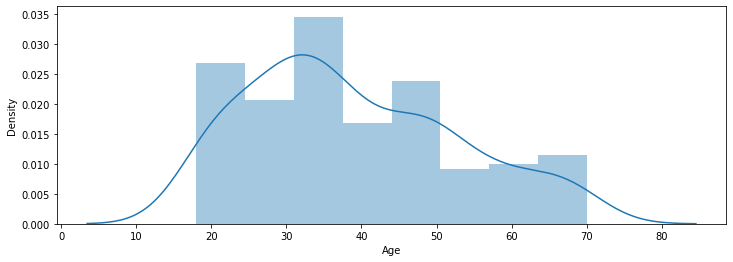

In [7]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Age'], kde = True )
plt.show()

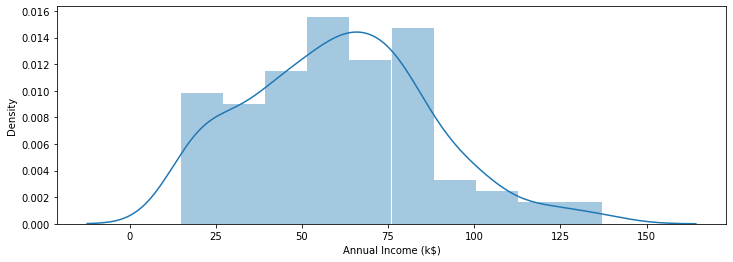

In [8]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Annual Income (k$)'], kde = True )
plt.show()

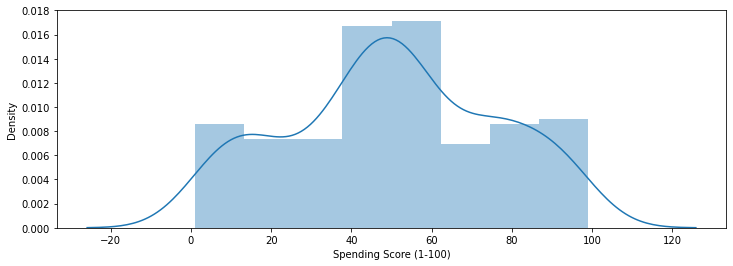

In [9]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Spending Score (1-100)'], kde = True )
plt.show()

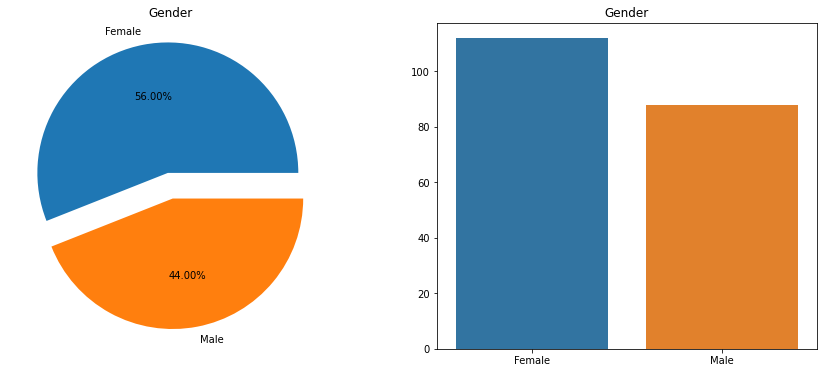

In [10]:
f, ax = plt.subplots(1, 2, figsize=(15,6))
df['Gender'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Gender')
ax[0].set_ylabel(None)
sns.barplot(data = df['Gender'].value_counts().reset_index(), x = 'index', y = 'Gender')
ax[1].set_title('Gender')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
plt.show()

<Figure size 720x360 with 0 Axes>

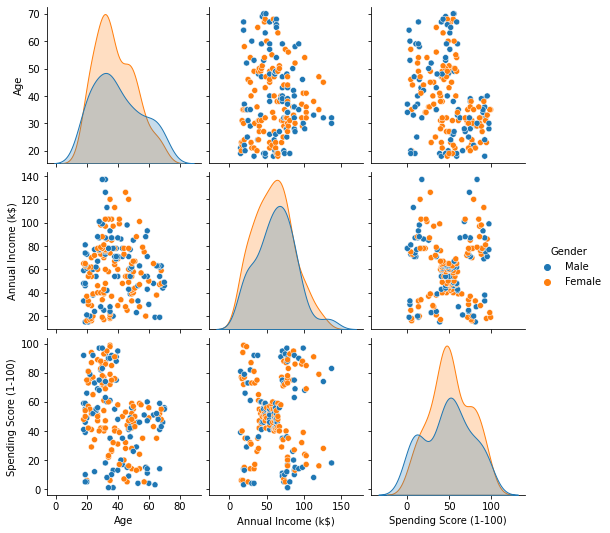

In [11]:
# 변수 간 관계 확인
plt.figure(figsize=(10, 5))
sns.pairplot(df, hue = "Gender")
plt.show()

In [12]:
# Gender = One-Hot Encoding
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


## 2. Clustering 
### KNN

In [13]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,15):
    k_means = KMeans(n_clusters=k).fit(df.iloc[:,:-1])
    inertia.append(k_means.inertia_)

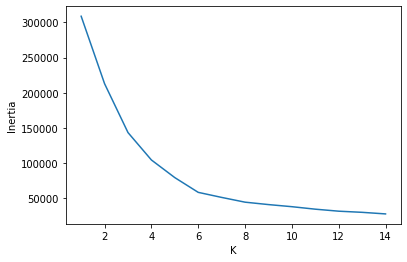

In [14]:
plt.plot(range(1,15),inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

이너셔의 변화를 관찰한 결과
* Elbow Point를 5정도라 판단 
* k = 5로 설정

In [15]:
kmeans = KMeans(n_clusters = 5).fit(df.iloc[:,:-1])

data1 = df.copy()
data1['cluster'] = kmeans.labels_
data1['cluster']=data1['cluster'].astype('category')
data1['cluster'].value_counts()

0    79
1    39
3    36
2    23
4    23
Name: cluster, dtype: int64

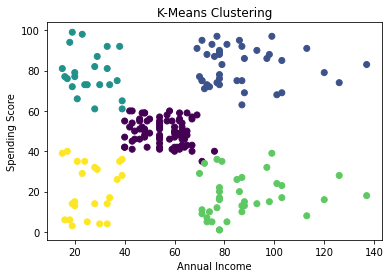

In [16]:
plt.title("K-Means Clustering")
plt.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], c = data1['cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

### Hierarchical clustering

* 최단 연결법 (single)     : 가장 가까이 있는 두 관측치 사이 거리

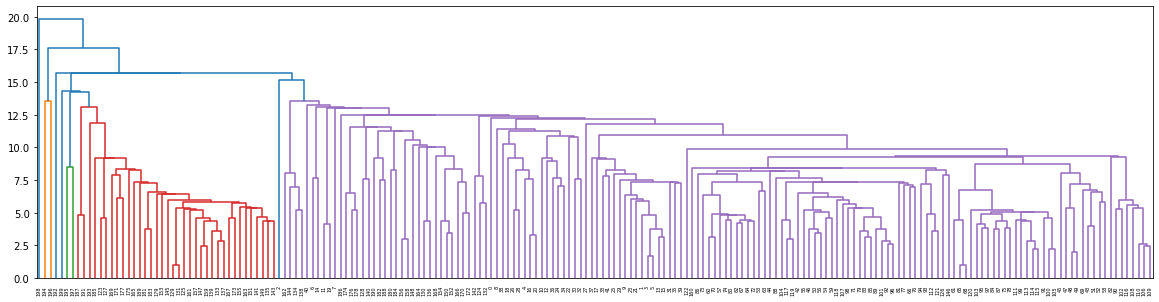

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

plt.figure(figsize=(20, 5))
cluster1 = linkage(df, method='single')
dendrogram(cluster1)
plt.show()

* 최장 연결법 (complete) : 가장 멀리 떨어진 두 관측치 사이 거리

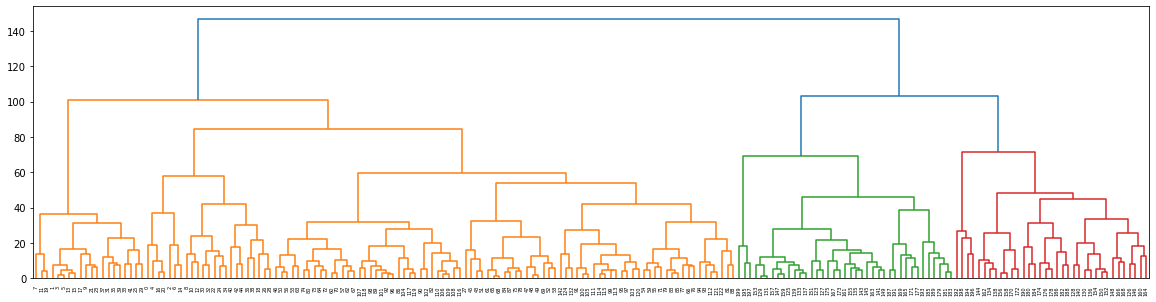

In [18]:
plt.figure(figsize=(20, 5))
cluster2 = linkage(df, method='complete')
dendrogram(cluster2)
plt.show()

* 평균 연결법 (average)  : 모든 가능한 거리의 평균 거리

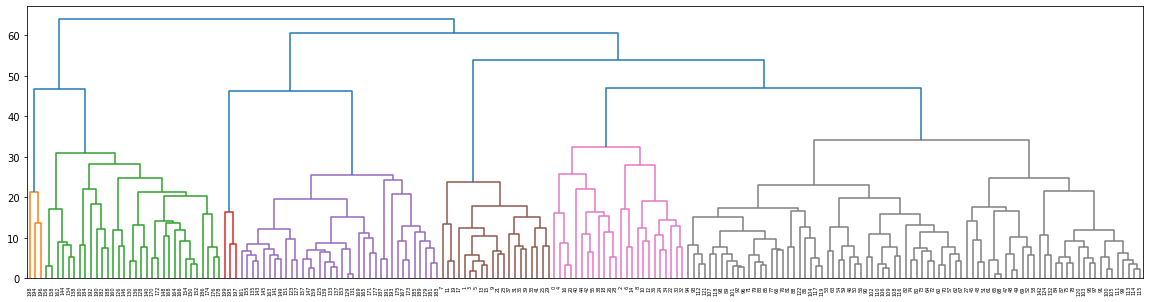

In [19]:
plt.figure(figsize=(20, 5))
cluster3 = linkage(df, method='average')
dendrogram(cluster3)
plt.show()

* 와드 연결법(Ward linkage)      : 군집 평균과 군집 내 유클리디언 최소 증가 방식
  * 군집간의 거리에 따라 데이터들을 연결하기 보다는 군집내 편차들의 제곱합(within group sum of squares)에 근거를 두고 군집들을 병합시키는 방법


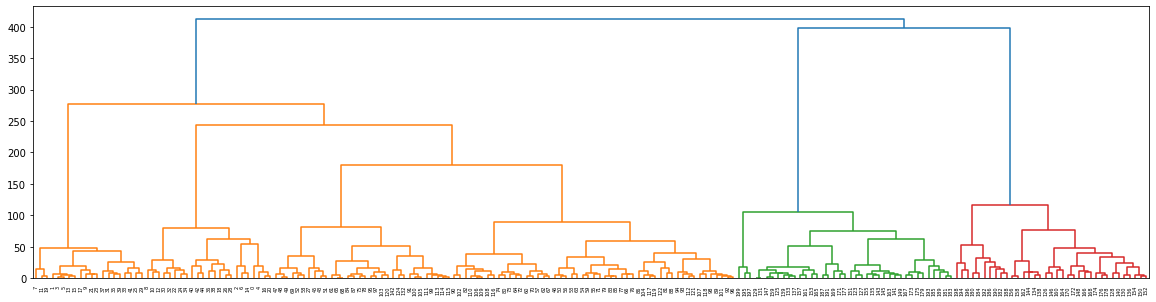

In [20]:
plt.figure(figsize=(20, 5))
cluster4 = linkage(df, method='ward')
dendrogram(cluster4)
plt.show()

## 3. Evaluation

In [24]:
from sklearn.metrics import silhouette_score, silhouette_samples

# 실루엣 계수 확인
average_score = silhouette_score(df.iloc[:,:-2], data1['cluster'])
print(f'K-means Silhouette Score: {average_score}')

K-means Silhouette Score: 0.44428597560893024
